In [1]:


import numpy as np
import scipy
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

### PART 1

* Logistic Regression for Binary Classification using the breast cancer dataset

* We aren't going to preprocess data or split into train/test since the focus here is purely on the gradient descent algorithm



In [2]:


# read the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# feature matrix X: mxn
X = dataset.data
print ("X: ", X.shape)

# target vector y: mx1
y = dataset.target
y = y.reshape(y.shape[0], 1)
print ("y: ", y.shape)

# number of samples: m
m = X.shape[0]
print ("m: ", m)

# number of features: n
n = X.shape[1]
features = dataset.feature_names
print ("n: ",n)
print ("features: ", features)

X:  (569, 30)
y:  (569, 1)
m:  569
n:  30
features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


0.9191564147627417


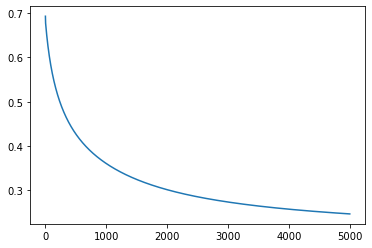

In [3]:


# train the logistic regression model

# initializae hyperparameters nepochs and alpha
nepochs = 5000
alpha = 2.5e-6

# initialize model parameters w and b
w = np.zeros((n,1))
b = 0

# this list will collect loss for each iteration
costs = []

for i in range(nepochs):
    #Forward Pass
    z = X@w + b
    yhat = scipy.special.expit(z)
    J = metrics.log_loss (y, yhat)
    
    #Backward propogation
    dJ_dw = (1/m)*X.T@(yhat - y)
    dJ_db = (1/m)*np.sum((yhat-y),axis=0,keepdims=True)
    
    #Gradient Descent
    w = w - alpha*dJ_dw
    b = b - alpha*dJ_db
    
    
    costs.append(J)
    
    


# use final parameters w and b to calcualte accuracy for training data X, y
#  - do a single forward pass for X: calcualte z, yhat
z = X@w + b
yhat = scipy.special.expit(z)
#  - set yhat to round(yhat) (that is, thresholding binary classification prediction at 0.5)
yhat = np.round(yhat)

#  - calcualte metrics.accuracy_score(y, yhat) and print it
### (1.6) YOUR CODE HERE
#J = metrics.log_loss (y, yhat)
#print(J)
accuracy = metrics.accuracy_score(y, yhat)
print(accuracy)

# use plt.plot(costs)  to plot  costs against iterations and show the plot
### (1.7) YOUR CODE HERE
plt.plot(costs)


In [4]:


# compare results from your implementation to that of SGDClassifier
# your accuracy score above should match (or be very close to) what you get from here

nepochs = 5000
alpha = 2.5e-6
y = y.reshape(y.shape[0],) # to avoid warning

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', # loss function for logistic regression
                    penalty=None, alpha=0, # no regularization
                    max_iter=nepochs, tol=None, # stop based only on nepochs
                    shuffle=False, random_state=0, # don't shuffle, use random state to replicate results
                    learning_rate='constant', eta0=alpha) # constant learning rate of alpha
clf.fit(X,y)
print (round(clf.score(X,y),2))

0.92


### Part 2

* Linear Regression using the diabetes dataset 

* We aren't going to preprocess data or split  into train/test since the focus here is purely on the gradient descent algorithm



In [5]:


# read the diabetes dataset from sklearn
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

# feature matrix X: mxn
X = dataset.data
print ("X: ", X.shape)

# target vector y: mx1
y = dataset.target
y = y.reshape(y.shape[0], 1)
print ("y: ", y.shape)

# number of samples: m
m = X.shape[0]
print ("m: ", m)

# number of features: n
n = X.shape[1]
features = dataset.feature_names
print ("n: ",n)
print ("features: ", features)

X:  (442, 10)
y:  (442, 1)
m:  442
n:  10
features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


2880.488150188168
0.514242147990263


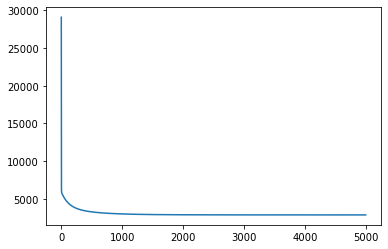

In [6]:

# train the linear regression model

# initialize hyperparameters nepochs and alpha
nepochs = 5000
alpha = 0.5

# initialize model paramters w and b
w = np.zeros((n,1))
b = 0

# this list will collect loss for each iteration
costs = []

# repeat for nepochs
### (2.1) YOUR CODE HERE
for i in range(nepochs):
    #Forward Pass
    z = X@w + b
    yhat = z
    J = metrics.mean_squared_error (y, yhat)
    
    #Backward pass
    dJ_dw = (1/m)*X.T@(yhat - y)
    dJ_db = (1/m)*np.sum((yhat-y),axis=0,keepdims=True)
    
    #Gradient descent
    w = w - alpha*dJ_dw
    b = b - alpha*dJ_db
    
    costs.append(J)
    

# use final parameters w and b to calcualte mse and r2 for training data X, y
#  - do a single forward pass for X: calcualte z, yhat
z = X@w + b
yhat = z
#  - calculate metrics.mean_squared_error(y, yhat) and print it
Squared_Error = metrics.mean_squared_error (y, yhat)
print(Squared_Error)
#  - calculate metrics.r2_score(y, yhat) and print it
R2 = metrics.r2_score(y, yhat)
print(R2)



# use plt.plot(costs) to plot costs against iterations and show the plot
### (2.7) YOUR CODE HERE
plt.plot(costs)


In [7]:


# compare results from our implementation to that of SGDRegressor
# your mse and r2 score above should match (or be very close to) what you get from here

nepochs = 5000
alpha = 0.5
y = y.reshape(y.shape[0],) # to avoid warning

from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(loss='squared_error', 
                    penalty=None, alpha=0,
                    max_iter=nepochs, tol=None, 
                    shuffle=False, random_state=0,
                    learning_rate='constant', eta0=alpha)
clf.fit(X,y)
yhat = clf.predict(X)
print (round(metrics.mean_squared_error(y, yhat),2))
print (round(clf.score(X,y),2))

2922.88
0.51
